# Evaluate BartPy on sample regression data

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

from matplotlib import pyplot as plt
%matplotlib inline

from bartpy.sklearnmodel import SklearnModel

In [2]:
regression = make_regression(n_samples=2000, n_features=20, n_informative=10)
X, y = regression

In [3]:
def get_clean_model():
    return SklearnModel(n_chains=4, 
                        n_jobs=-1, 
                        n_burn=200,
                        n_samples=1000, 
                        n_trees=200, 
                        initializer=None)

In [4]:
model = get_clean_model()
model.fit(X, y)

SklearnModel(alpha=0.95, beta=2.0, initializer=None, n_burn=200, n_chains=4,
             n_jobs=-1, n_samples=1000, n_trees=200, sigma_a=0.001,
             sigma_b=0.001, store_acceptance_trace=False,
             store_in_sample_predictions=False, thin=0.1,
             tree_sampler=<bartpy.samplers.unconstrainedtree.treemutation.UnconstrainedTreeMutationSampler object at 0x7fd298c11f10>)

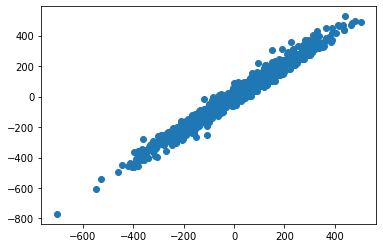

In [5]:
plt.scatter(model.predict(X), y)

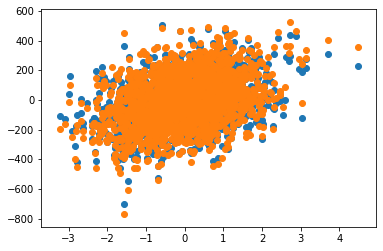

In [6]:
plt.scatter(X[:, 0], model.predict(X))
plt.scatter(X[:, 0], y)

In [7]:
from sklearn.model_selection import KFold
from datetime import datetime
from catboost import CatBoostRegressor, Pool
kf = KFold(n_splits=2, shuffle=True)
b_scores, c_scores = [], []
for train_index, test_index in kf.split(X):
    print(datetime.now())
    model = get_clean_model()
    model.fit(X[train_index], y[train_index])
    b_scores.append(np.sum(np.square(y[test_index] - model.predict(X[test_index]))))
    print(datetime.now())
    eval_pool = Pool(X[train_index][:300,:], y[train_index][:300])
    train_pool = Pool(X[train_index][300:,:], y[train_index][300:])
    c_model = CatBoostRegressor()
    c_model.fit(train_pool, eval_set=eval_pool, verbose=300)
    c_scores.append(np.sum(np.square(y[test_index] - c_model.predict(X[test_index]))))
    print(datetime.now())

2020-02-05 08:45:31.178163
2020-02-05 08:47:50.598099
Learning rate set to 0.043074
0:	learn: 153.8237301	test: 170.9859251	best: 170.9859251 (0)	total: 55.7ms	remaining: 55.6s
300:	learn: 11.7652868	test: 41.8285107	best: 41.8285107 (300)	total: 869ms	remaining: 2.02s
600:	learn: 4.9212923	test: 37.3946619	best: 37.3946619 (600)	total: 1.68s	remaining: 1.11s
900:	learn: 2.6105102	test: 36.5869786	best: 36.5869786 (900)	total: 2.46s	remaining: 271ms
999:	learn: 2.1047594	test: 36.4953980	best: 36.4953980 (999)	total: 2.73s	remaining: 0us

bestTest = 36.49539798
bestIteration = 999

2020-02-05 08:47:53.511703
2020-02-05 08:47:53.512103
2020-02-05 08:49:55.523054
Learning rate set to 0.043074
0:	learn: 165.3079260	test: 160.2259262	best: 160.2259262 (0)	total: 2.28ms	remaining: 2.28s
300:	learn: 11.5576619	test: 33.1391005	best: 33.1391005 (300)	total: 537ms	remaining: 1.25s
600:	learn: 4.8629551	test: 29.1160878	best: 29.1160878 (600)	total: 906ms	remaining: 601ms
900:	learn: 2.5112892	

In [8]:
print(b_scores)
print(c_scores)

[964705.2906824035, 1016191.4718016029]
[1179905.8774384584, 880745.2650863533]


In [9]:
np.sqrt(b_scores[0]) / X.shape[0], np.sqrt(c_scores[0]) / X.shape[0]

(0.491097060335939, 0.5431173624177509)

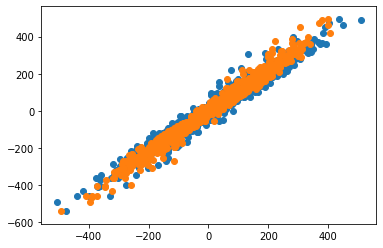

In [10]:
plt.scatter(model.predict(X[test_index]), y[test_index])
plt.scatter(c_model.predict(X[test_index]), y[test_index])

0.9755208151788579

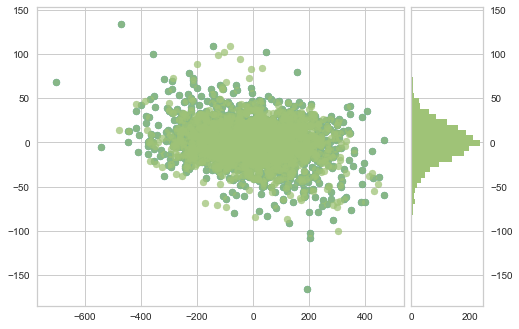

In [11]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = get_clean_model()
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train) 
visualizer.score(X, y)

0.9700097741424252

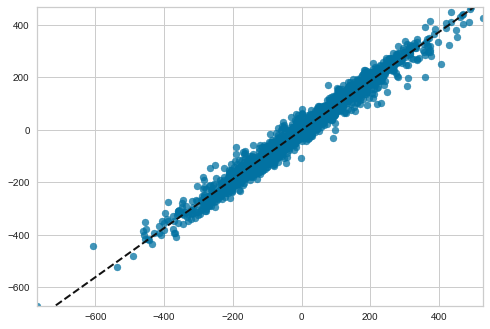

In [12]:
from yellowbrick.regressor import PredictionError
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = get_clean_model()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train) 
visualizer.score(X, y)